In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["axes.grid"] = False
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [31]:
afile = '~/forLenovoUbuntu/datfile/heartdisease/Integrated.csv'

In [32]:
df = pd.read_csv(afile, sep=',', header = None)
y = df[0]

In [59]:
# load categorical data
asecondfile = '~/LM_code_final/saved_9.11/data/SPECTF.train'
asecfile = pd.read_csv(asecondfile, sep=',', header = None)
asecfile.head(10)

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,72,62,69,67,78,82,74,65,69,...,65,71,63,60,69,73,67,71,56,58
2,1,71,62,70,64,67,64,79,65,70,...,73,70,66,65,64,55,61,41,51,46
3,1,69,71,70,78,61,63,67,65,59,...,61,61,66,65,72,73,68,68,59,63
4,1,70,66,61,66,61,58,69,69,72,...,67,69,70,66,70,64,60,55,49,41
5,1,57,69,68,75,69,74,73,71,57,...,63,58,69,67,79,77,72,70,61,65
6,1,69,66,62,75,67,71,72,76,69,...,69,70,72,72,69,68,70,73,63,59
7,1,61,60,60,62,64,72,68,67,74,...,66,66,66,60,60,58,60,67,49,52
8,1,65,62,67,68,65,67,71,71,64,...,67,63,74,63,77,79,68,70,59,56
9,1,74,73,72,79,66,61,76,66,65,...,64,62,73,69,62,67,60,56,53,46


In [34]:
y1 = y.to_numpy()
y = np.array([1 if xy < 0.5 else 0 for xy in y1])
dummies = pd.get_dummies(df[57], prefix='col', drop_first=False)

In [35]:
onehotencoder = OneHotEncoder(categories='auto')
y2= onehotencoder.fit_transform(y1.reshape(-1, 1))

In [36]:
import numpy as np

In [37]:
df1 = df.drop(df.columns[[0, 43, 57, 75]], axis=1)

In [38]:
df1.shape

(899, 72)

In [39]:
minmax_scaling = preprocessing.MinMaxScaler()
x_scaled = minmax_scaling.fit_transform(df1)
x_scaled = pd.DataFrame(x_scaled)

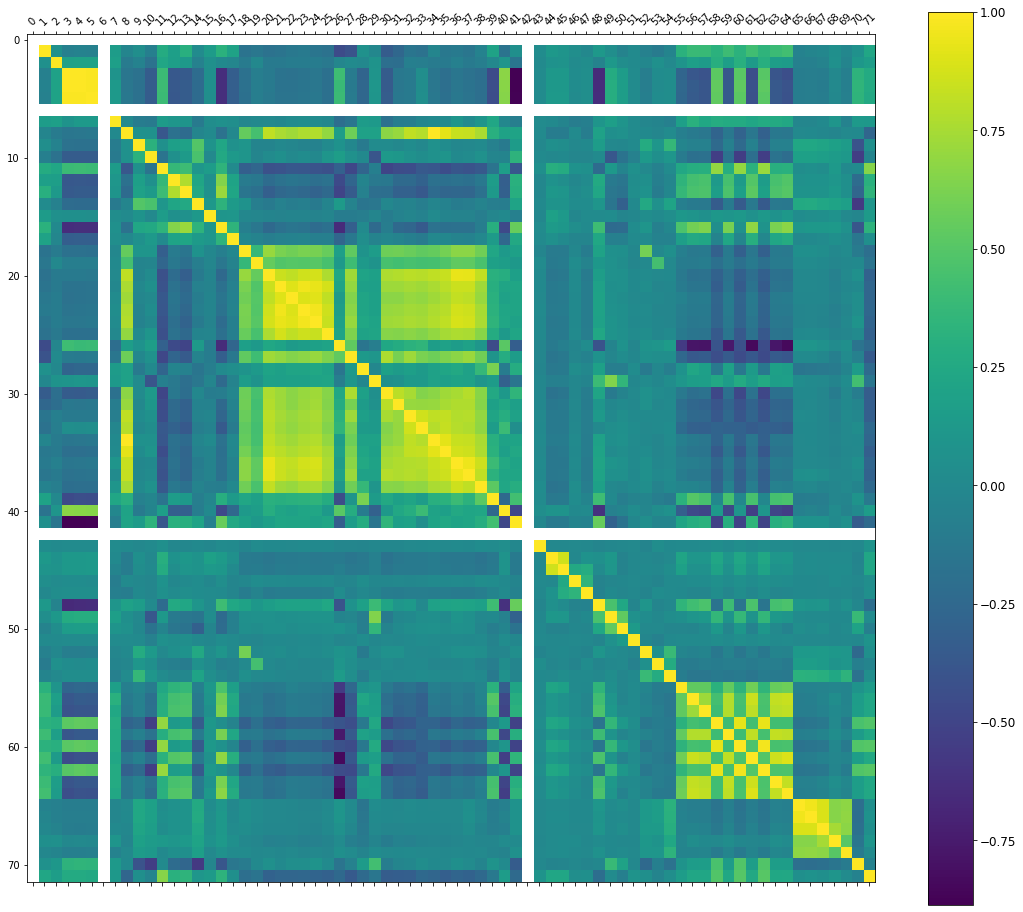

In [40]:
f1 = plt.figure(figsize=(19, 16))
plt.matshow(df1.corr(), fignum=f1.number)
plt.xticks(range(df1.shape[1]), x_scaled.columns, fontsize=10, rotation=45)
plt.xticks(range(df1.shape[1]), x_scaled.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.show()

In [48]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, test_size=0.30, shuffle=False)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(xtrain)
Xtest = sc.transform(xtest)

In [51]:
pca = PCA(n_components=30)
pca2 = PCA(n_components=2)
pca3 = PCA(n_components=3)
Xtrain = pca.fit_transform(Xtrain)
Xtest = pca.transform(Xtest)
explained_var = pca.explained_variance_ratio_

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state = 0)
classifier.fit(Xtrain, ytrain)

/home/nath/miniconda3/envs/deepl/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [53]:
y_pred=classifier.predict(Xtest)

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print('accuracy = ',  accuracy_score(ytest, y_pred))
print(cm)

accuracy =  1.0
[[270]]


In [55]:
park_dat = '~/LM_code_final/data/heartdisease/ReplicatedAcousticFeatures-ParkinsonDatabase.csv'

In [56]:
df_parkinson = pd.read_csv(park_dat, sep=',')
df_parkinson.shape

(240, 48)

In [60]:
df_parkinson.head()

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023


In [23]:
ylabel = df_parkinson['Status']
print(df_parkinson.shape)
xfeatures = df_parkinson.drop(['Status', 'ID'], axis=1)
xfeatsp = pd.DataFrame(xfeatures)

(240, 48)


In [21]:
xfeatsp.shape

(240, 46)

In [24]:
minmax_scaling = preprocessing.MinMaxScaler()
x_scaledp = minmax_scaling.fit_transform(xfeatsp)
x_scaledp = pd.DataFrame(x_scaledp)
x_scaledp.head(10)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.0,1.0,0.016061,0.013838,0.018272,0.009937,0.123204,0.117758,0.128479,0.133357,...,0.586076,0.481663,0.611573,0.538082,0.619583,0.585395,0.523017,0.535943,0.606600,0.512993
1,0.5,1.0,0.033128,0.026883,0.029038,0.018839,0.084804,0.081529,0.087959,0.085670,...,0.516186,0.323181,0.451680,0.482782,0.532051,0.520934,0.451593,0.458389,0.529983,0.486673
2,1.0,1.0,0.013024,0.011126,0.015624,0.007959,0.064238,0.060686,0.070115,0.073549,...,0.590283,0.404422,0.511732,0.545380,0.623875,0.523690,0.553400,0.521801,0.519374,0.471351
3,0.0,0.0,0.021702,0.018904,0.009881,0.006367,0.093284,0.085540,0.101745,0.099377,...,0.671531,0.579277,0.557605,0.599766,0.639152,0.760696,0.653484,0.734509,0.753475,0.738809
4,0.5,0.0,0.012367,0.013801,0.009142,0.005743,0.030650,0.030358,0.028363,0.036702,...,0.678173,0.412632,0.832145,0.753281,0.589239,0.701697,0.731973,0.645242,0.513153,0.536190
5,1.0,0.0,0.002523,0.005418,0.003257,0.002422,0.017402,0.017680,0.019789,0.022989,...,0.652755,0.697169,0.604973,0.773302,0.613219,0.536310,0.718987,0.745858,0.791770,0.574779
6,0.0,1.0,0.011517,0.013298,0.015749,0.006610,0.052588,0.049406,0.057011,0.059636,...,0.864330,0.483521,0.727891,0.605540,0.651569,0.765300,0.472001,0.822783,0.929731,0.767706
7,0.5,1.0,0.012384,0.013771,0.015529,0.007950,0.055796,0.055159,0.053851,0.064977,...,0.702720,0.657573,0.566076,0.402858,0.752690,0.462167,0.631765,0.742665,0.799718,0.728820
8,1.0,1.0,0.012103,0.014569,0.016143,0.008907,0.068407,0.065839,0.065766,0.079018,...,0.780826,0.493591,0.820898,0.516813,0.626919,0.475416,0.561723,0.492711,0.738588,0.495799
9,0.0,1.0,0.173686,0.177048,0.175287,0.081734,0.125829,0.122221,0.138734,0.104220,...,0.707916,0.423074,0.751185,0.544460,0.678140,0.629798,0.678440,0.509582,0.711624,0.697652


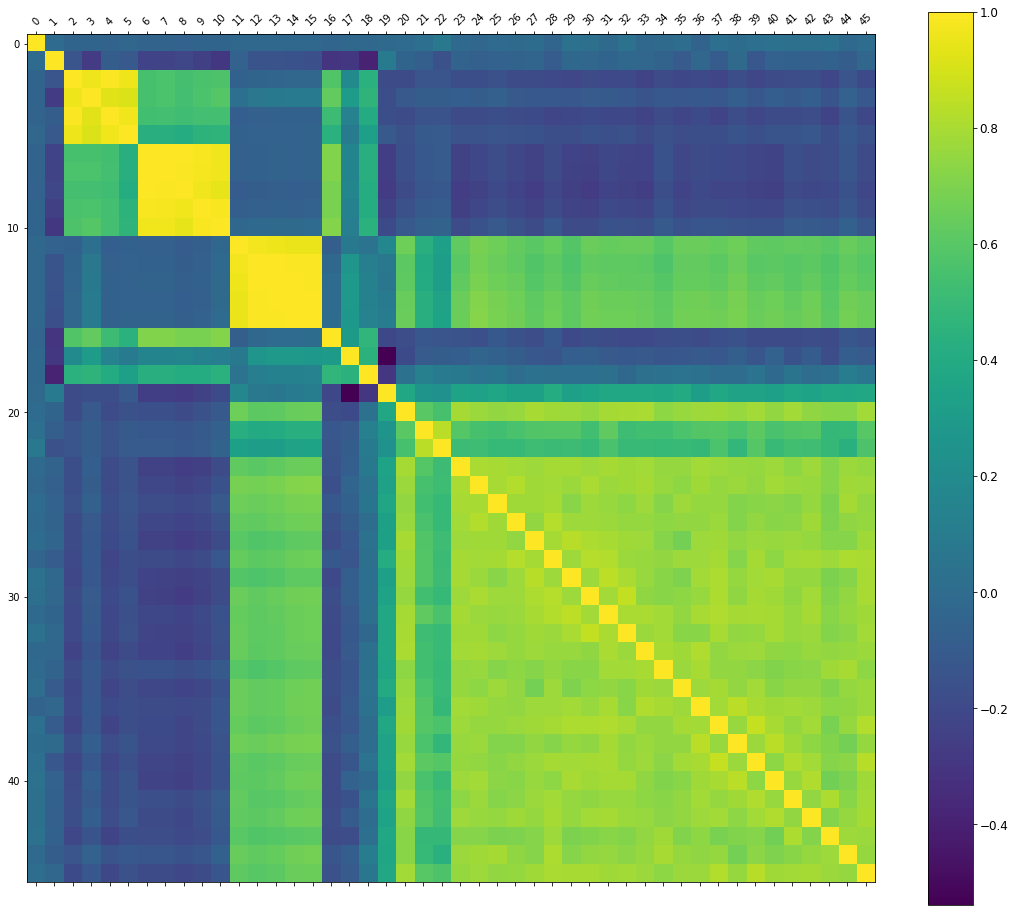

In [20]:
f1 = plt.figure(figsize=(19, 16))
plt.matshow(x_scaledp.corr(), fignum=f1.number)
plt.xticks(range(x_scaledp.shape[1]), x_scaledp.columns, fontsize=10, rotation=45)
plt.xticks(range(x_scaledp.shape[1]), x_scaledp.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.show()

In [21]:
pc_data = 'home/saved_codes/tfExample/datafiles/breast-cancer-wisconsin-data/data.csv'

In [22]:
df_heart_dat = pd.read_csv(pc_data, sep=',')

In [23]:
df_heart_dat.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [24]:
y = df_heart_dat.diagnosis
x_data = df_heart_dat.drop(['Unnamed: 32', 'id', 'diagnosis'], axis=1)

In [25]:
minmax_scaling = preprocessing.MinMaxScaler()
x_data = pd.DataFrame(x_data)
x_scaled0 = minmax_scaling.fit_transform(x_data)
x_scaled00 = pd.DataFrame(x_scaled0)

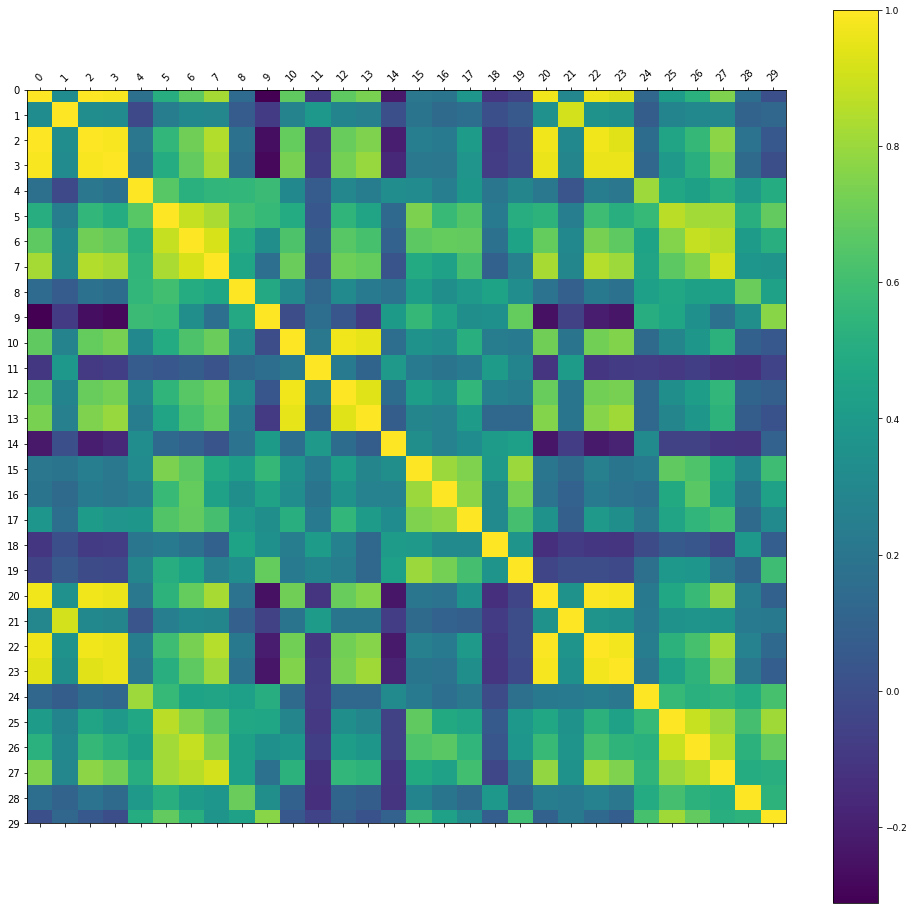

In [27]:
f3 = plt.figure(figsize=(17, 16))
plt.matshow(x_scaled00.corr(), fignum=f3.number)
plt.xticks(range(x_scaled00.shape[1]), x_scaled00.columns, fontsize=10, rotation=45)
plt.yticks(range(x_scaled00.shape[1]), x_scaled00.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=9)
plt.show()

In [36]:
# Input the file for cervial cancer data

In [28]:
df_cervical = pd.read_csv('~/forLenovoUbuntu/datfile/otherdata/datasets/risk_factors_cervical_cancer.csv', sep = ',')

In [29]:
df_cervical.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [30]:
df_cervical.shape

(858, 36)

In [37]:
def rmissingvaluecol(dff,threshold):
    l = []
    l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index))>=threshold))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values:"%threshold,(dff.shape[1] - len(l)))
    print("Columns:\n",list(set(list((dff.columns.values))) - set(l)))
    return l

In [38]:
l=rmissingvaluecol(df_cervical, 50)

# Columns having more than 50 percent missing values: 0
Columns:
 []


In [39]:
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

missing(df_cervical)

Biopsy                                0.0
Citology                              0.0
STDs:vaginal condylomatosis           0.0
STDs:cervical condylomatosis          0.0
STDs:condylomatosis                   0.0
STDs (number)                         0.0
STDs                                  0.0
IUD (years)                           0.0
IUD                                   0.0
Hormonal Contraceptives (years)       0.0
Hormonal Contraceptives               0.0
Smokes (packs/year)                   0.0
Smokes (years)                        0.0
Smokes                                0.0
Num of pregnancies                    0.0
First sexual intercourse              0.0
Number of sexual partners             0.0
STDs:vulvo-perineal condylomatosis    0.0
STDs:syphilis                         0.0
STDs:pelvic inflammatory disease      0.0
STDs: Time since last diagnosis       0.0
Schiller                              0.0
Hinselmann                            0.0
Dx                                

In [44]:
thresh = len(df_cervical) * .2
df_cervical.dropna(thresh = thresh, axis = 1, inplace = True)

In [43]:
df_cervical

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,...,?,?,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,1,0
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,...,?,?,0,0,0,0,0,0,0,0


In [42]:
all_cancer_dat = '~/forLenovoUbuntu/datfile/heartdisease/ReplicatedAcousticFeatures-ParkinsonDatabase.csv'

In [81]:
df_all = pd.read_csv(all_cancer_dat, sep=',')

In [82]:
# all_cancer_dat = all_cancer_dat.drop(all_cancer_dat.columns[57], axis=1)

In [83]:
df_all.head()

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023


In [84]:
x_df = df_all.drop(['ID'], axis=1)

In [85]:
minmax_scaling = preprocessing.MinMaxScaler()
xdf = pd.DataFrame(x_df)
xscaledf = minmax_scaling.fit_transform(xdf)
xscaledf = pd.DataFrame(xscaledf)

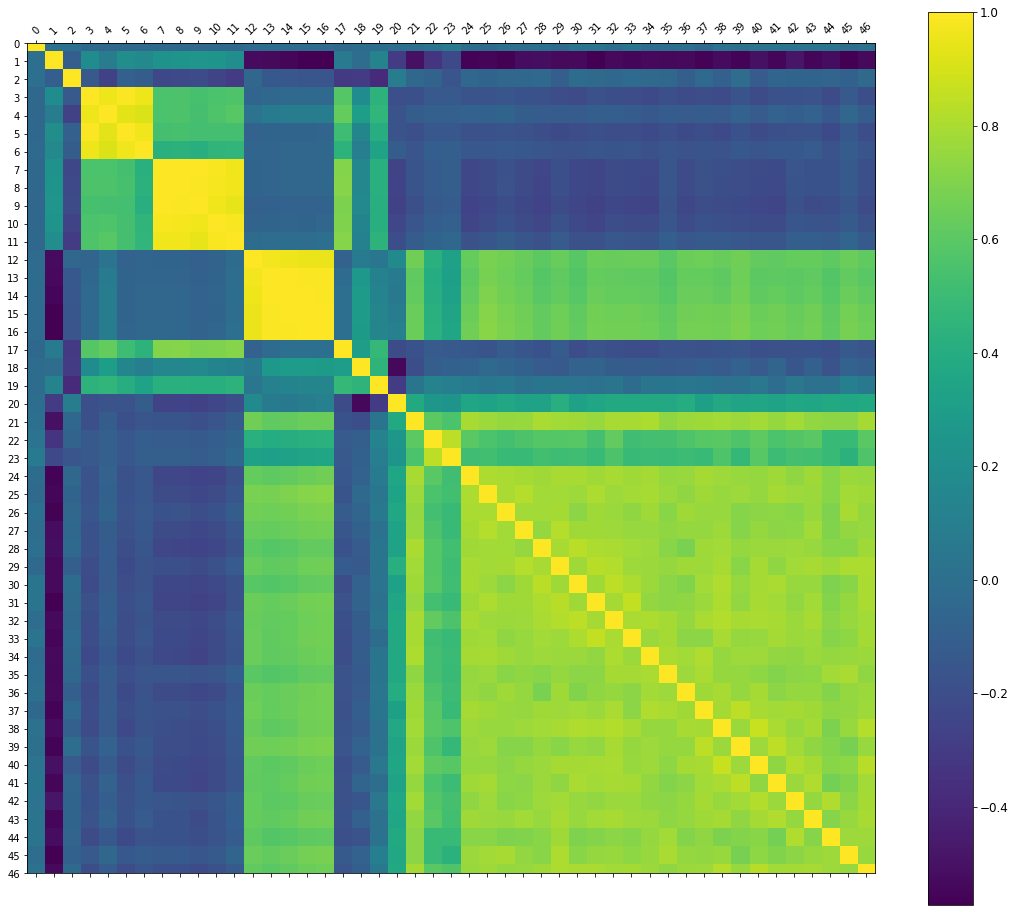

In [86]:
f4 = plt.figure(figsize=(19, 16))
plt.matshow(xscaledf.corr(), fignum=f4.number)
plt.xticks(range(xscaledf.shape[1]), xscaledf.columns, fontsize=10, rotation=45)
plt.yticks(range(xscaledf.shape[1]), xscaledf.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.show()

In [88]:
# Data seems like a multi-labeled data
multilabel_data = pd.read_csv('~/LM_code_final/saved_9.11/data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv')

In [92]:
multilabel_data.head(10)

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
5,1.0,0.099704,-0.033408,0.349895,0.344535,0.247569,0.022407,-0.213767,-0.127916,0.277353,...,-0.080487,-0.130089,-0.171478,-0.071569,0.077643,0.064903,Leptodactylidae,Adenomera,AdenomeraAndre,1
6,1.0,0.021676,-0.062075,0.318229,0.380439,0.179043,-0.041667,-0.252300,-0.167117,0.220027,...,-0.046620,-0.055146,-0.085972,-0.009127,0.065630,0.044040,Leptodactylidae,Adenomera,AdenomeraAndre,1
7,1.0,0.145130,-0.033660,0.284166,0.279537,0.175211,0.005791,-0.183329,-0.158483,0.192567,...,-0.055978,-0.048219,-0.056637,-0.022419,0.070085,0.021419,Leptodactylidae,Adenomera,AdenomeraAndre,1
8,1.0,0.271326,0.027777,0.375738,0.385432,0.272457,0.098192,-0.173730,-0.157857,0.207181,...,-0.120723,-0.112607,-0.156933,-0.118527,-0.002471,0.002304,Leptodactylidae,Adenomera,AdenomeraAndre,1
9,1.0,0.120565,-0.107235,0.316555,0.364437,0.307757,0.025992,-0.294179,-0.223236,0.268435,...,-0.051073,-0.052568,-0.111338,-0.040014,0.090204,0.088025,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [93]:
multilabel_data.shape

(7195, 26)

In [95]:
m_label_dat = multilabel_data.drop(['Family', 'Genus', 'Species', 'RecordID'], axis=1)

In [96]:
minmax_scaling = preprocessing.MinMaxScaler()
xdf_multi = pd.DataFrame(m_label_dat)
xscaled_multi = minmax_scaling.fit_transform(xdf_multi)
xscaled_multi = pd.DataFrame(xscaled_multi)

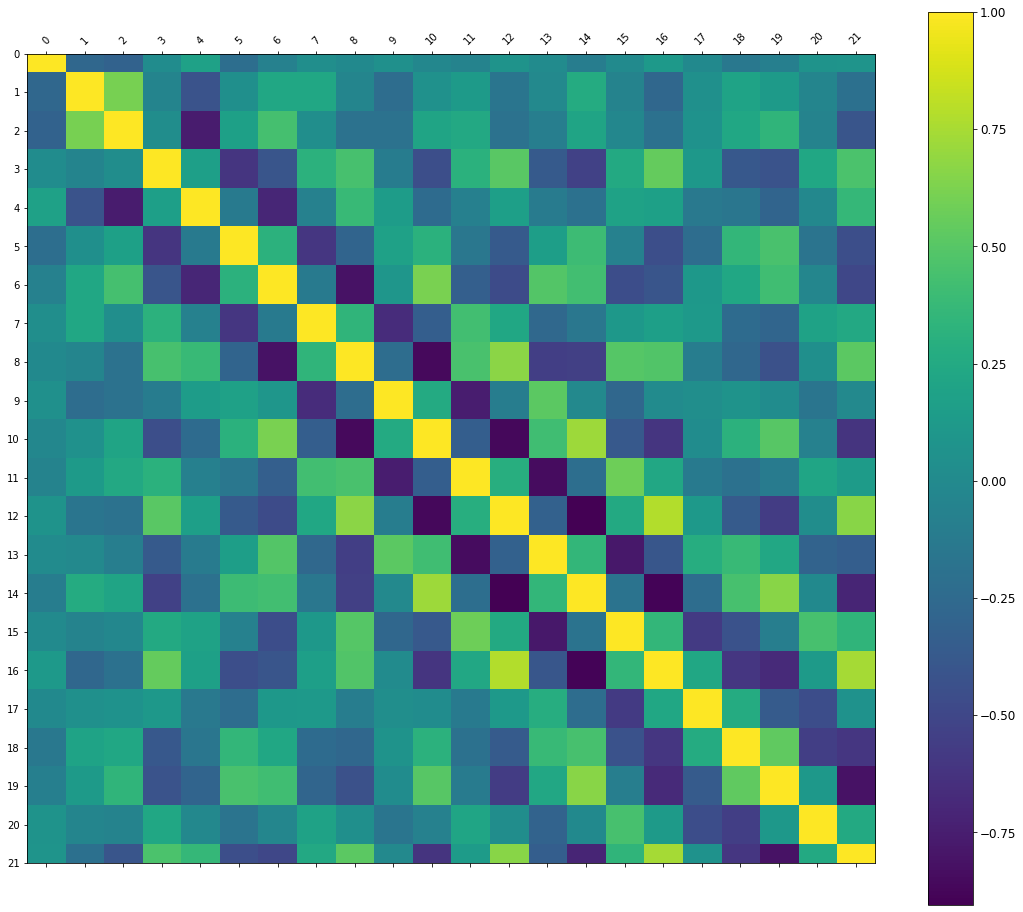

In [98]:
f4 = plt.figure(figsize=(19, 16))
plt.matshow(xscaled_multi.corr(), fignum=f4.number)
plt.xticks(range(xscaled_multi.shape[1]), xscaled_multi.columns, fontsize=10, rotation=45)
plt.yticks(range(xscaled_multi.shape[1]), xscaled_multi.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.show()